In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=1.2
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [43]:
# Load the dataset
auto = pd.read_csv('adverts_clean.csv')

In [44]:
auto

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,year_listed,month_listed,...,standard_colour_Turquoise,standard_colour_Yellow,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Natural Gas,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
0,0.000000,0.972477,0.948586,1.0,1.000000,0.534990,0.8125,0.0,1.000000,0.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.439526,0.431193,0.951157,0.0,0.896552,0.303535,0.8750,0.0,1.000000,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.163863,0.834862,0.968295,0.0,0.965517,0.366788,0.8125,0.0,1.000000,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.316998,0.954128,0.601542,0.0,0.954023,0.315373,0.4375,0.0,1.000000,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.361505,0.495413,0.713796,0.0,0.942529,0.430279,0.8125,0.0,1.000000,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,0.140163,0.715596,0.035133,0.0,0.988506,0.340904,0.4375,0.0,1.000000,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402001,0.442182,0.715596,0.005141,0.0,0.873563,0.198354,0.4375,0.0,1.000000,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402002,0.336392,0.660550,0.683805,0.0,0.908046,0.306647,0.8125,0.0,1.000000,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402003,0.181767,0.018349,0.107969,0.0,0.942529,0.348372,0.4375,0.0,1.000000,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


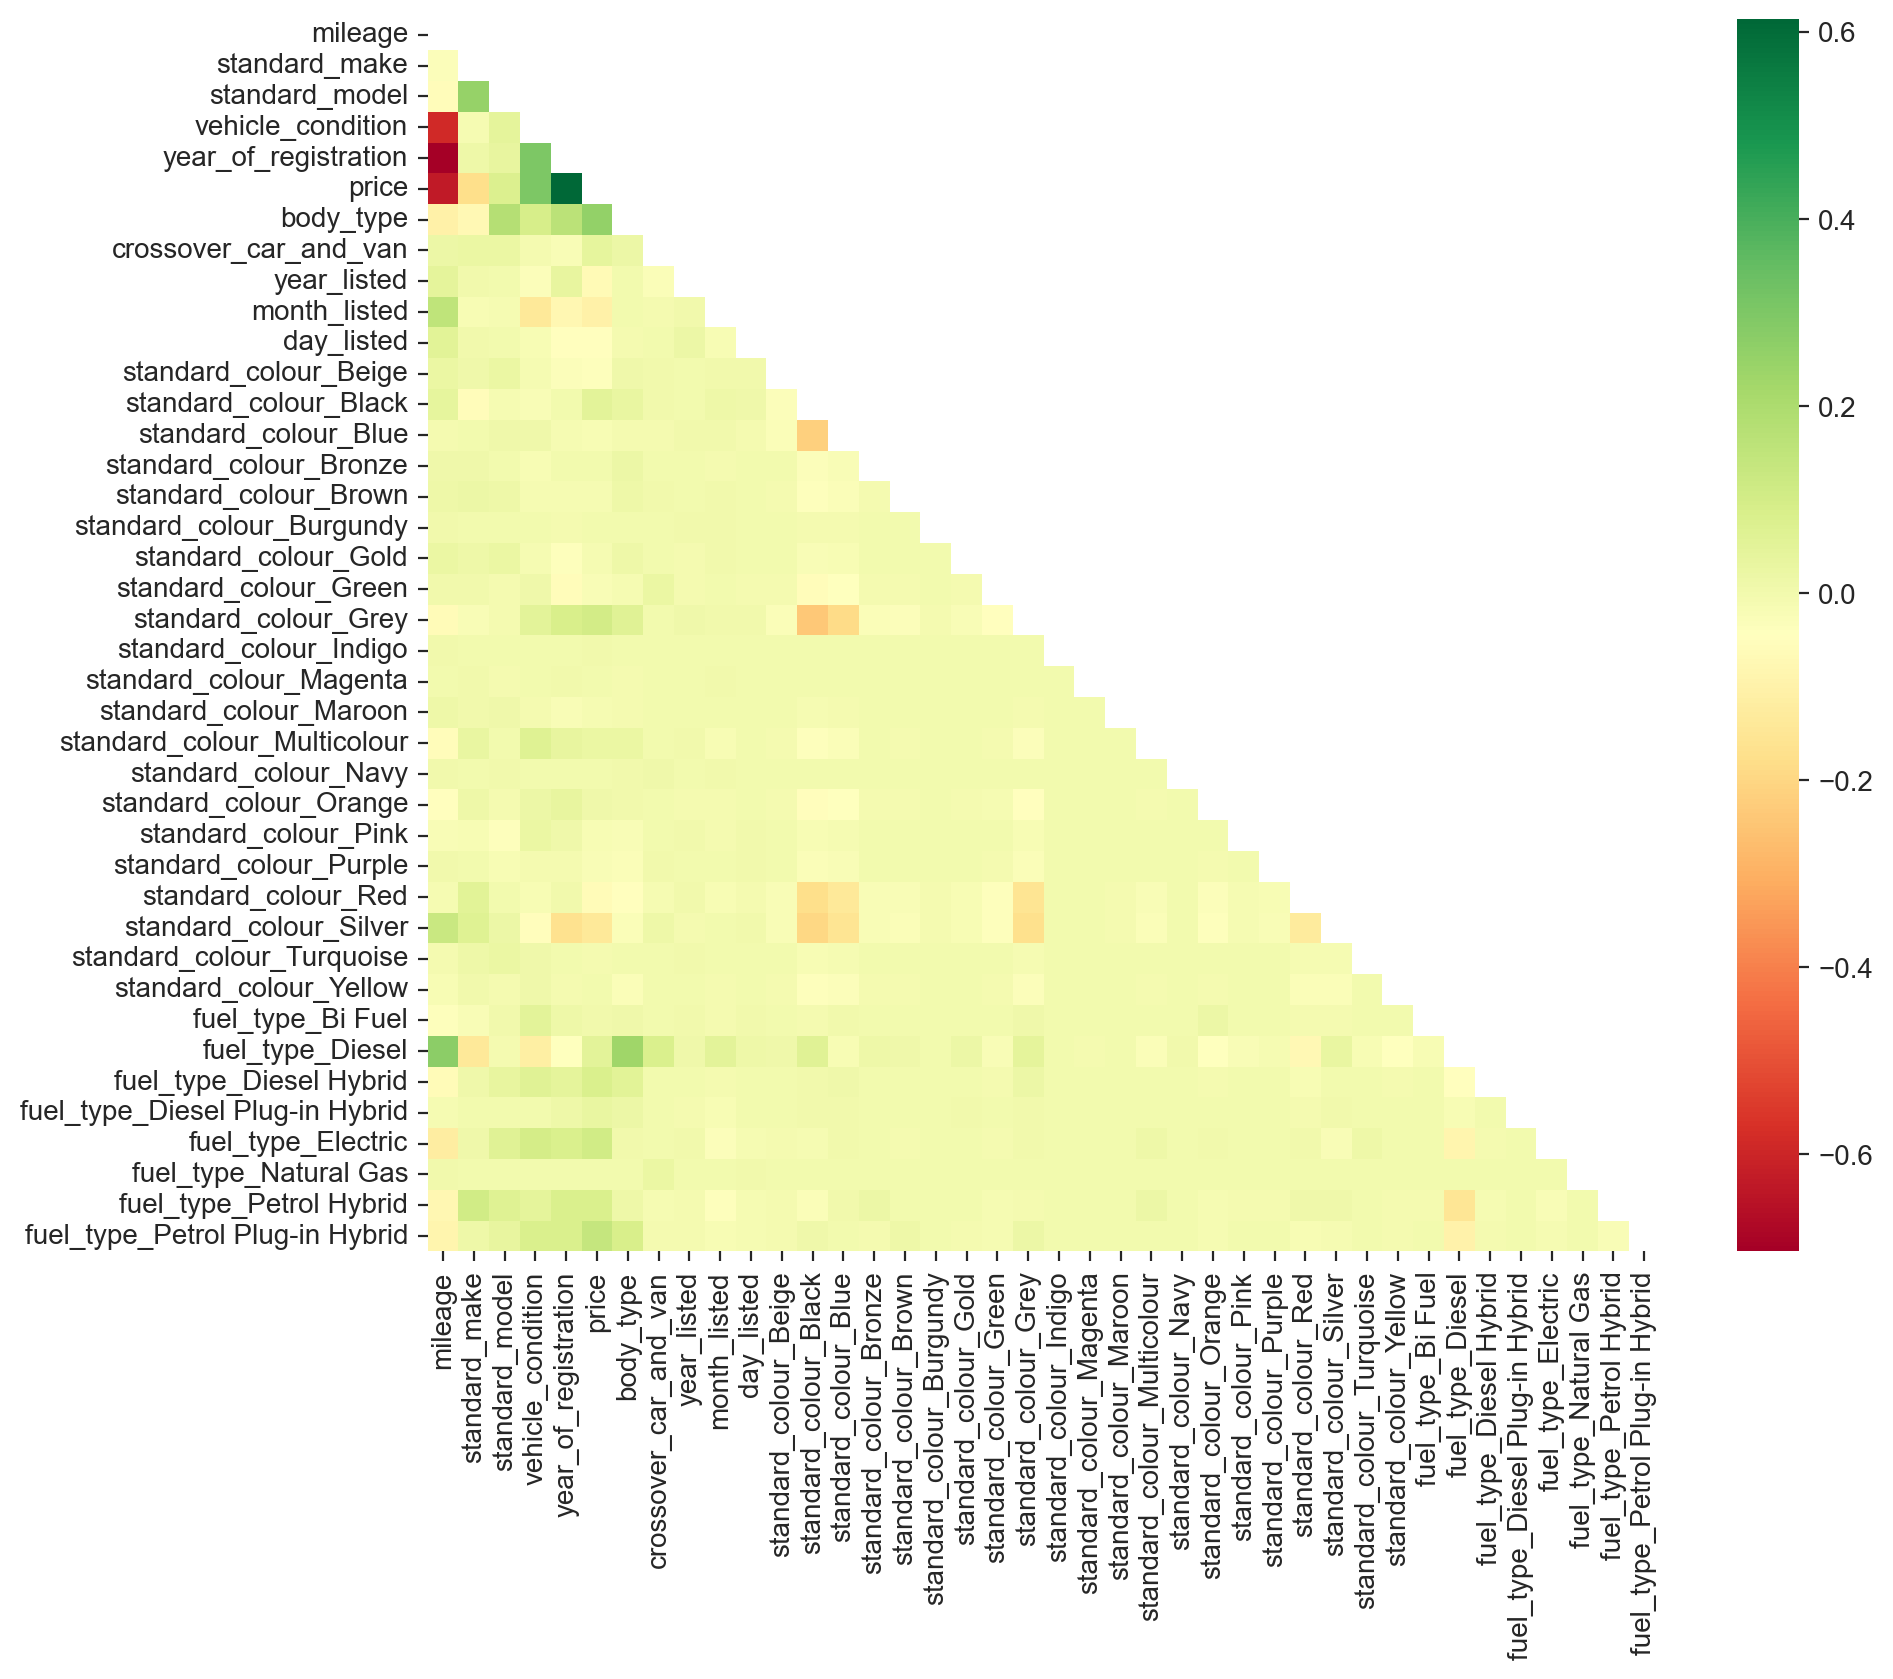

In [45]:
# Calculate the correlation matrix
corr_matrix = auto.corr()

# Create a mask to hide the upper triangle (including the diagonal) with the NumPy .triu function
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure and the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, mask=mask, square=True, annot=False, cmap='RdYlGn');

In [46]:
seed = 42

In [47]:
X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Cross validation

In [ ]:
models=[];
models.append(('LNR', LinearRegression()))
models.append(("FTR", RandomForestRegressor()))
models.append(("KNN", KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(("MLP", MLPRegressor()))

# Set a seed for reproducibility
np.random.seed(seed)

names=[];
result=[];
for name,model in models:
    k_fold=model_selection.KFold(n_splits=5, shuffle=True)
    score=model_selection.cross_val_score(model, X, y, cv=k_fold);
    result.append(score)
    names.append(name)
    print(name,score.mean().round(3),score.std().round(3))

LNR 0.566 0.004


In [ ]:
result

[array([0.5699803 , 0.55904957, 0.56533268, 0.5666981 , 0.56764259]),
 array([0.78947829, 0.79302122, 0.79135895, 0.79303163, 0.79504055]),
 array([0.90635089, 0.90566828, 0.90033049, 0.90465552, 0.90175702])]

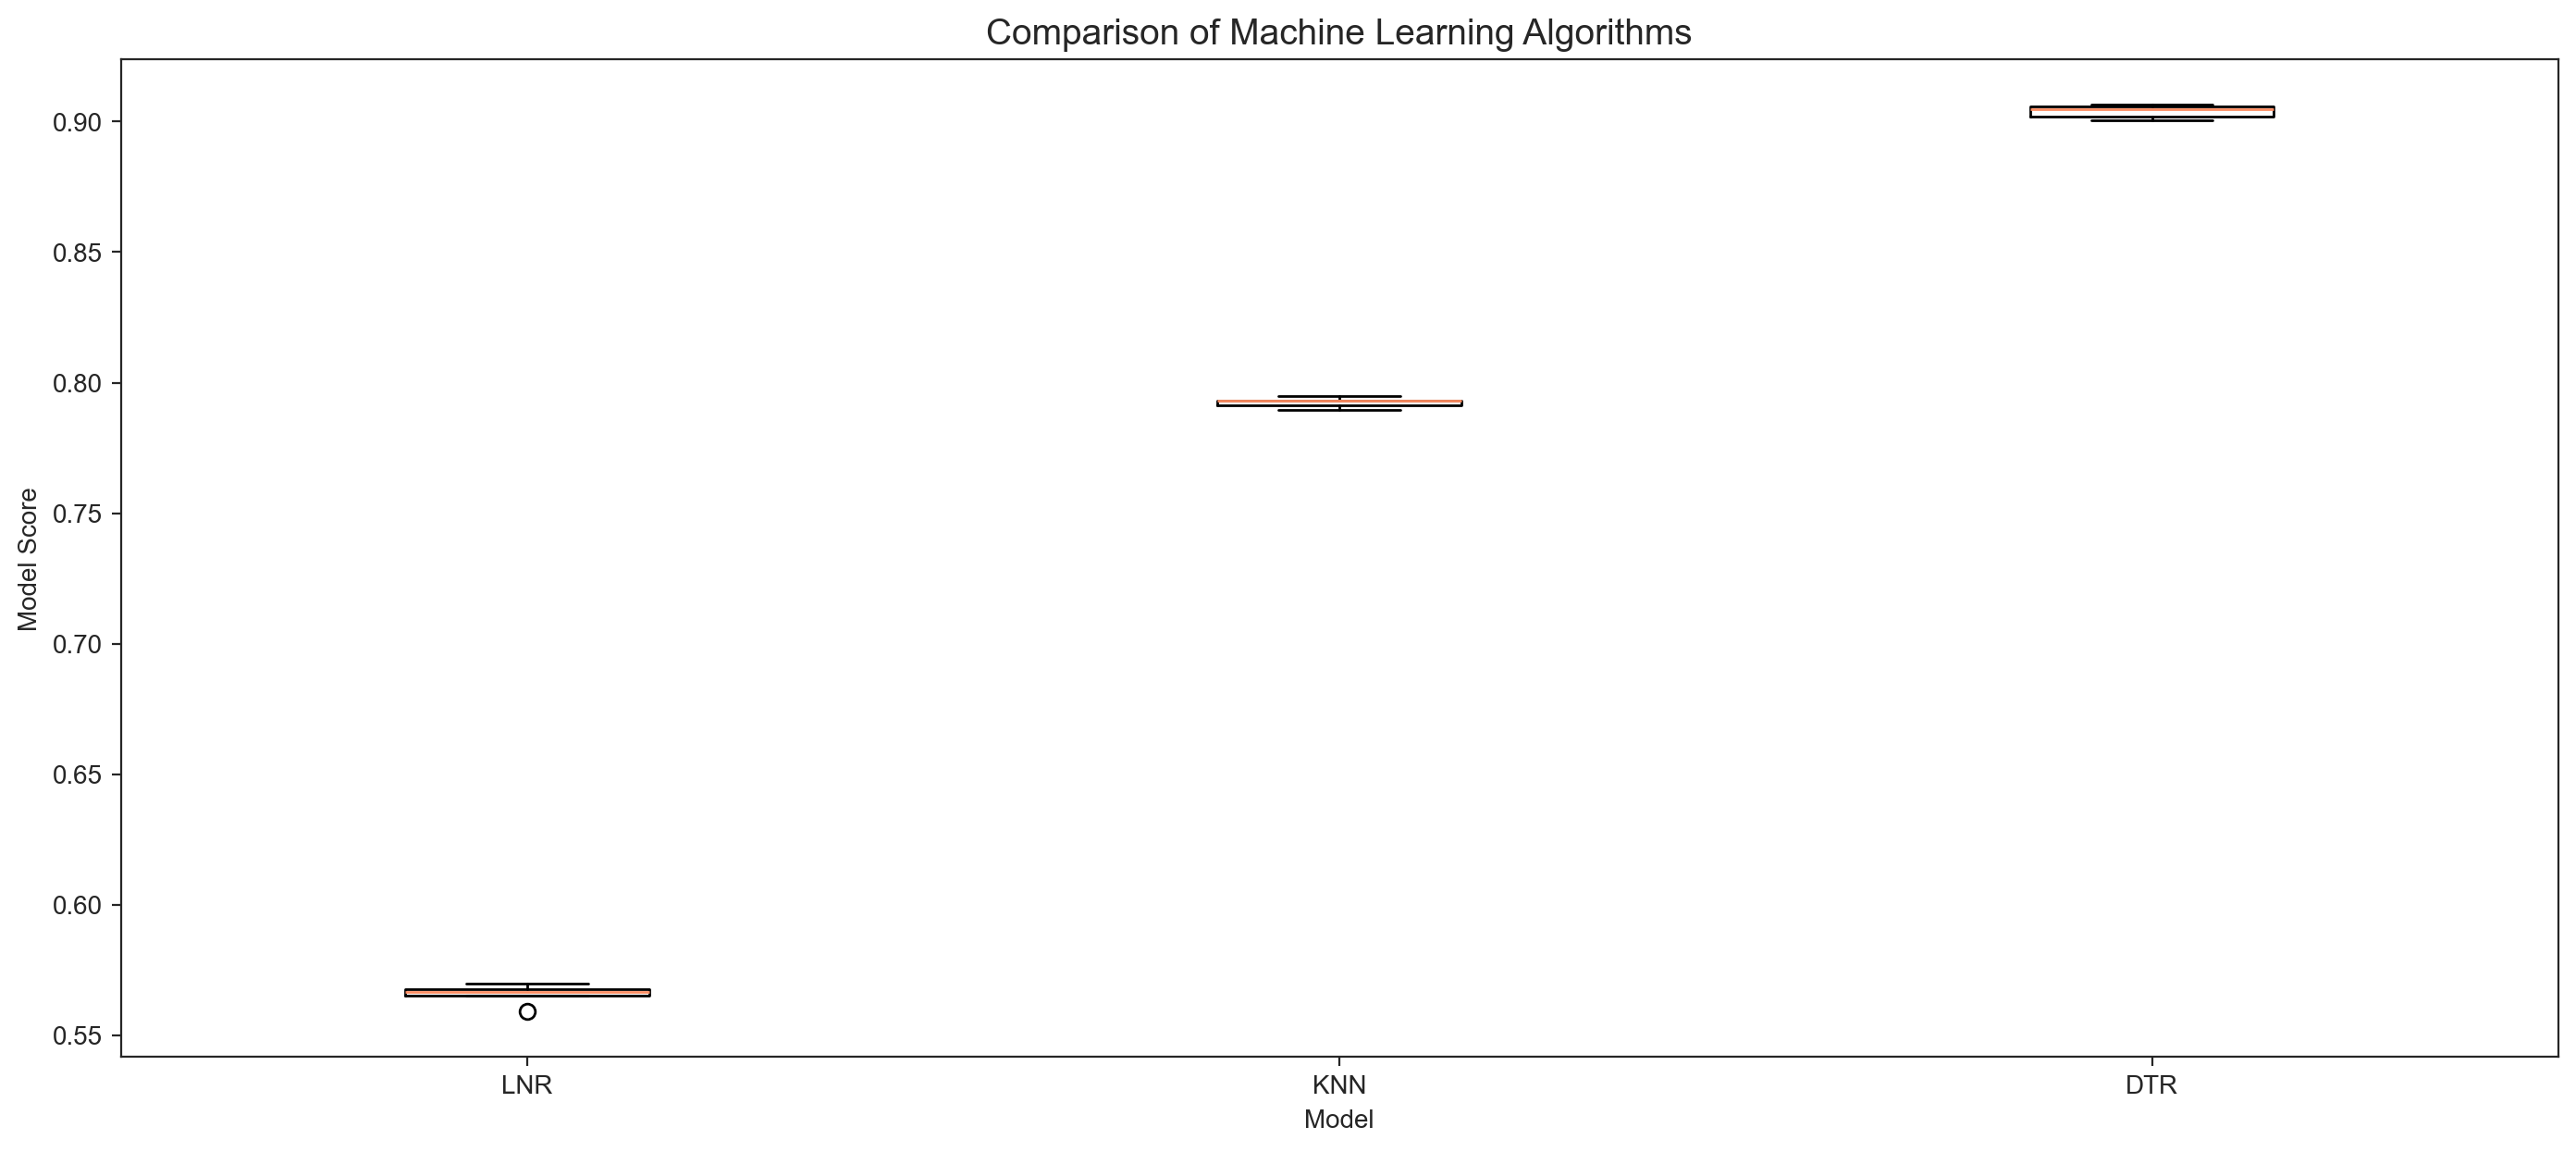

In [ ]:
plt.boxplot(result,labels=names)
plt.title('Comparison of Machine Learning Algorithms',fontsize=14)
plt.gca().set(ylabel='Model Score', xlabel='Model')
plt.show()